In [14]:
import os
import xarray as xr

import cfgrib
import matplotlib.pyplot as plt

# workspace_directory = r'C:\Users\trygg\Documents\Master_project' #HOME
workspace_directory = r'C:\Users\tryggvisi\Documents\my-awesome-masters-project' #WORK
os.chdir(workspace_directory)  # Change the current working directory to the specified workspace

In [11]:
path_to_grib = r"Data\ERA5\ERA5_new_project\adaptor.mars.internal-1710430612.139692-24364-13-4f6d1416-ff10-437a-89fa-9e1792914190.grib"
grib_file_path = path_to_grib
print(path_to_grib)
ds = xr.load_dataset(grib_file_path, engine="cfgrib")

Data\ERA5\ERA5_new_project\adaptor.mars.internal-1710430612.139692-24364-13-4f6d1416-ff10-437a-89fa-9e1792914190.grib


In [12]:
#clip entire dataset to my study area specs
lat_max, lat_min = 64, 67  # Example latitude bounds
lon_min, lon_max = 14, 17  # Example longitude bounds
clipped_ds = ds.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
clipped_ds

<xarray.Dataset>
Dimensions:     (time: 10933, latitude: 13, longitude: 13)
Coordinates:
    number      int32 0
  * time        (time) datetime64[ns] 2017-01-01T03:00:00 ... 2023-04-30T15:0...
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 67.0 66.75 66.5 66.25 ... 64.5 64.25 64.0
  * longitude   (longitude) float64 14.0 14.25 14.5 14.75 ... 16.5 16.75 17.0
    valid_time  (time) datetime64[ns] 2017-01-01T03:00:00 ... 2023-04-30T15:0...
Data variables:
    skt         (time, latitude, longitude) float32 268.8 267.0 ... 277.1 276.8
    rsn         (time, latitude, longitude) float32 188.6 187.2 ... 152.3 163.1
    sd          (time, latitude, longitude) float32 0.02841 0.06075 ... 0.003165
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-03-15T16:39 GRIB to CDM+CF via cfgrib-0.9.1...

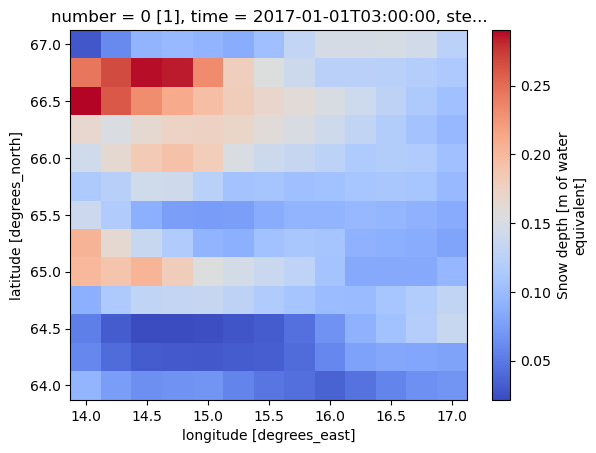

In [15]:
clipped_ds.sd[0].plot(cmap=plt.cm.coolwarm)

In [18]:

import numpy as np
ds_skin1 = clipped_ds.skt[60]

In [22]:
# Get latitude and longitude values from ds_skin1
lats = ds_skin1['latitude'].values
lons = ds_skin1['longitude'].values

# Get data values from ds_skin1
data = ds_skin1.values  # Replace 'your_variable_name' with the variable you want to extract

# Calculate latitude and longitude centers
lat_centers = ((lats + lats) / 2)
lon_centers = ((lons + lons) / 2)

# Create a grid with zeros
grid = np.zeros((len(lat_centers), len(lon_centers)))
grid[:, :] = data[:len(lat_centers), :len(lon_centers)]  # Ensure data matches the shape of the grid

# Create a DataArray with the grid data
data_array = xr.DataArray(grid, 
                          dims=('latitude', 'longitude'),
                          coords={'latitude': lat_centers,
                                  'longitude': lon_centers})

# Create a Dataset containing the DataArray
ds_center = xr.Dataset({'skt': data_array})

# Optionally, you can assign coordinate variables if needed
ds_center['latitude'] = lat_centers
ds_center['longitude'] = lon_centers

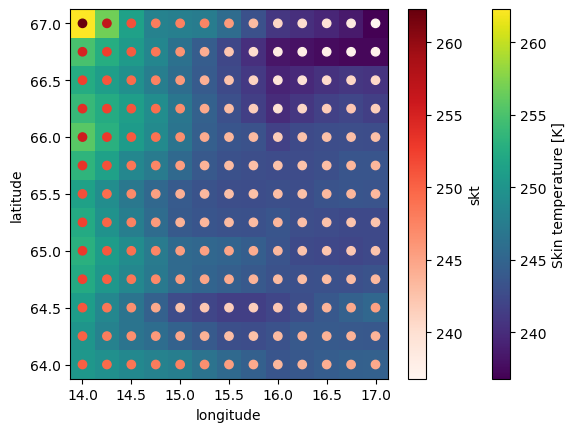

In [26]:
# Plotting ds_skin1 as the background
ds_skin1.plot()

# Plotting dataset on top of ds_skin1
ds_center.plot.scatter(x='longitude', y='latitude', hue='skt', cmap='Reds')

plt.show()